In [1]:
pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\USER\Downloads\train.csv")

print(df.head())
print(df.info())

   id      date  store_nbr      family  sales  onpromotion
0   0  1/1/2013          1  AUTOMOTIVE    0.0            0
1   1  1/1/2013          1   BABY CARE    0.0            0
2   2  1/1/2013          1      BEAUTY    0.0            0
3   3  1/1/2013          1   BEVERAGES    0.0            0
4   4  1/1/2013          1       BOOKS    0.0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1048575 non-null  int64  
 1   date         1048575 non-null  object 
 2   store_nbr    1048575 non-null  int64  
 3   family       1048575 non-null  object 
 4   sales        1048575 non-null  float64
 5   onpromotion  1048575 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 48.0+ MB
None


In [5]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
print(df.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [7]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["dayofweek"] = df["date"].dt.dayofweek

In [14]:
print(df_model.head())
print(df_model.dtypes)

   sales  onpromotion  year  month  day  dayofweek
0    0.0            0  2013      1    1          1
1    0.0            0  2013      1    1          1
2    0.0            0  2013      1    1          1
3    0.0            0  2013      1    1          1
4    0.0            0  2013      1    1          1
sales          float64
onpromotion      int64
year             int32
month            int32
day              int32
dayofweek        int32
dtype: object


In [15]:
X = df_model.drop("sales", axis=1)
y = df_model["sales"]
print(X, y)

         onpromotion  year  month  day  dayofweek
0                  0  2013      1    1          1
1                  0  2013      1    1          1
2                  0  2013      1    1          1
3                  0  2013      1    1          1
4                  0  2013      1    1          1
...              ...   ...    ...  ...        ...
1048570            1  2014      8   13          2
1048571            0  2014      8   13          2
1048572            1  2014      8   13          2
1048573            0  2014      8   13          2
1048574            0  2014      8   13          2

[1048575 rows x 5 columns] 0            0.000
1            0.000
2            0.000
3            0.000
4            0.000
            ...   
1048570    974.098
1048571    324.293
1048572     10.000
1048573      0.000
1048574     69.116
Name: sales, Length: 1048575, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2 Score:", r2)

MAE: 357.78095945067486
R2 Score: 0.011790846585227777


MAE → lower is better

R² → closer to 1 is better

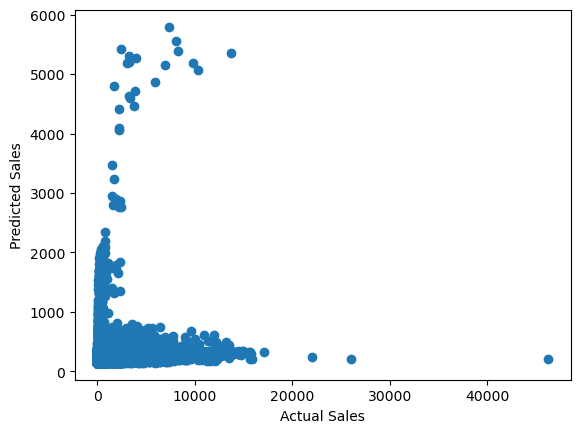

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

In [22]:
holidays = pd.read_csv(r"C:\Users\USER\Downloads\holidays_events.csv")
holidays["date"] = pd.to_datetime(holidays["date"])

In [23]:
df = df.merge(holidays[["date", "type"]], on="date", how="left")
df["is_holiday"] = df["type"].notnull().astype(int)

In [24]:
"is_holiday"

'is_holiday'

Sales Prediction Using Linear Regression

This project focuses on predicting store sales using a linear regression model. The goal is to understand how time and promotional activities influence sales performance.

The dataset was cleaned and prepared by converting dates and creating time-based features like year, month, day, and day of the week. Promotional data was also included as a key factor affecting sales.

A train-test split was applied to evaluate the model’s performance on unseen data. The linear regression model was then trained to learn the relationship between sales and the selected features.

Model performance was evaluated using metrics like Mean Absolute Error (MAE) and R² score to measure prediction accuracy.

This project provides hands-on experience in data cleaning, feature engineering, and building a basic regression model for real-world sales forecasting.